# Plotting and Visualization

## A Brief matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [5]:
data=np.arange(10)

In [6]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

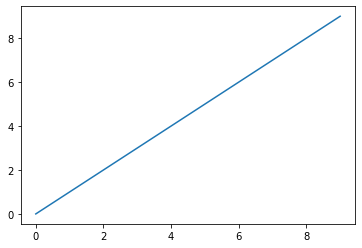

In [7]:
plt.plot(data)

### Figures and Subplots

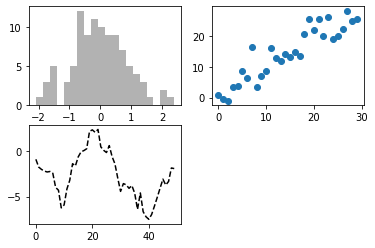

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

#### Adjusting the spacing around subplots

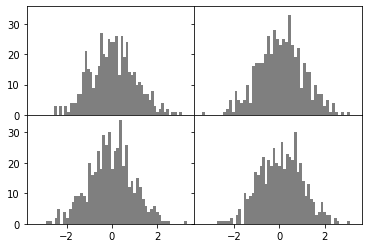

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Style

In [20]:
from numpy.random import randn

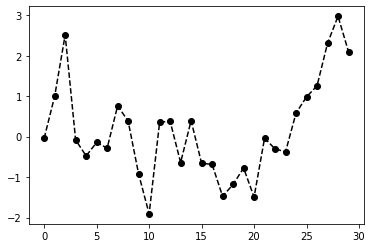

In [21]:
plt.plot(randn(30).cumsum(), 'ko--')

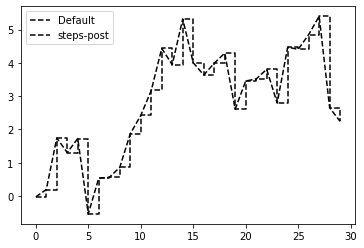

In [23]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Annotations and Drawing on a Subplot

In [25]:
from datetime import datetime

In [27]:
import pandas as pd

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

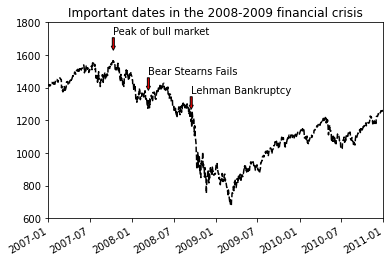

In [33]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data=pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx=data['SPX']
spx.plot(ax=ax, style='k--')
crisis_data=[
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy') 
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75), 
                xytext=(date, spx.asof(date)+225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

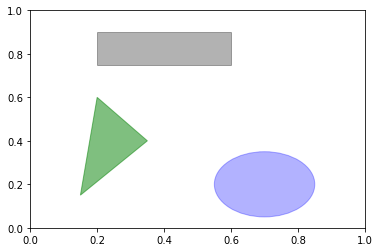

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Plotting with pandas and seaborn

### Bar plot

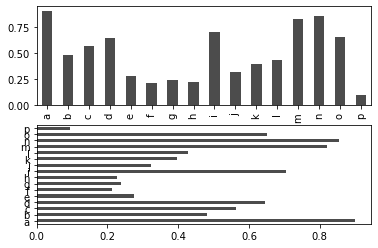

In [35]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [36]:
df = pd.DataFrame(np.random.rand(6, 4),
....: index=['one', 'two', 'three', 'four', 'five', 'six'],
....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

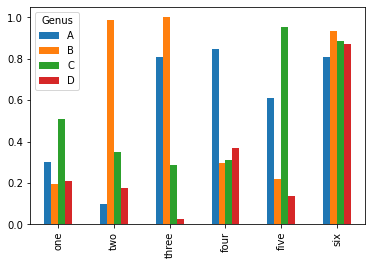

In [38]:
df.plot.bar()

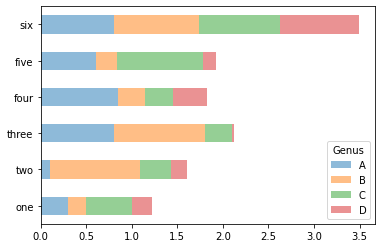

In [39]:
df.plot.barh(stacked=True, alpha=0.5)

In [40]:
tips = pd.read_csv('examples/tips.csv')

In [41]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [42]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [43]:
party_counts = party_counts.loc[:, 2:5]

In [44]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [45]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [46]:
import seaborn as sns

In [47]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

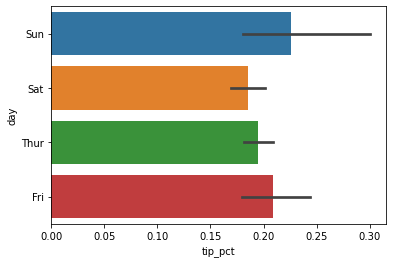

In [48]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

### Scatter or Point Plots

In [49]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

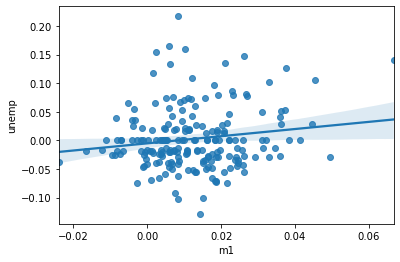

In [50]:
sns.regplot('m1', 'unemp',data=trans_data)

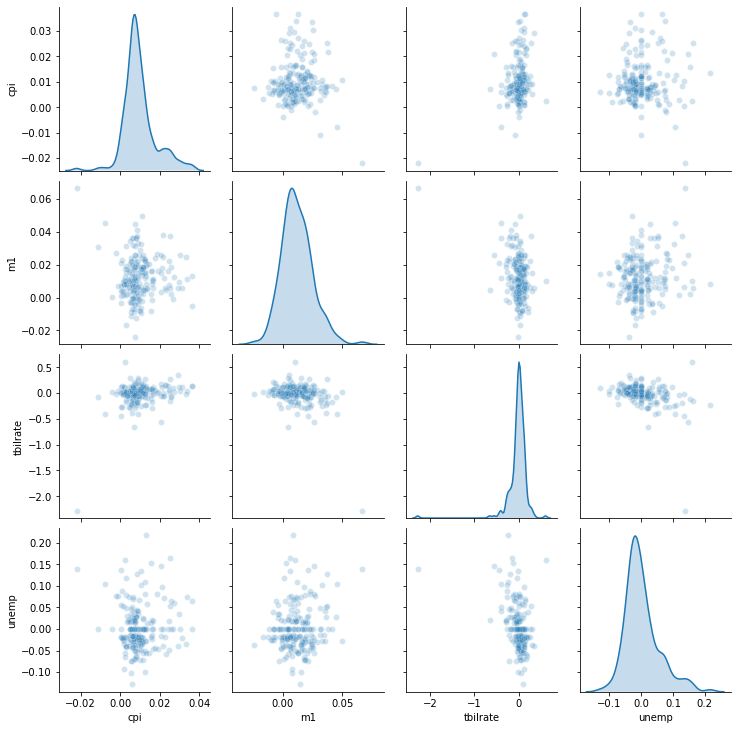

In [53]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


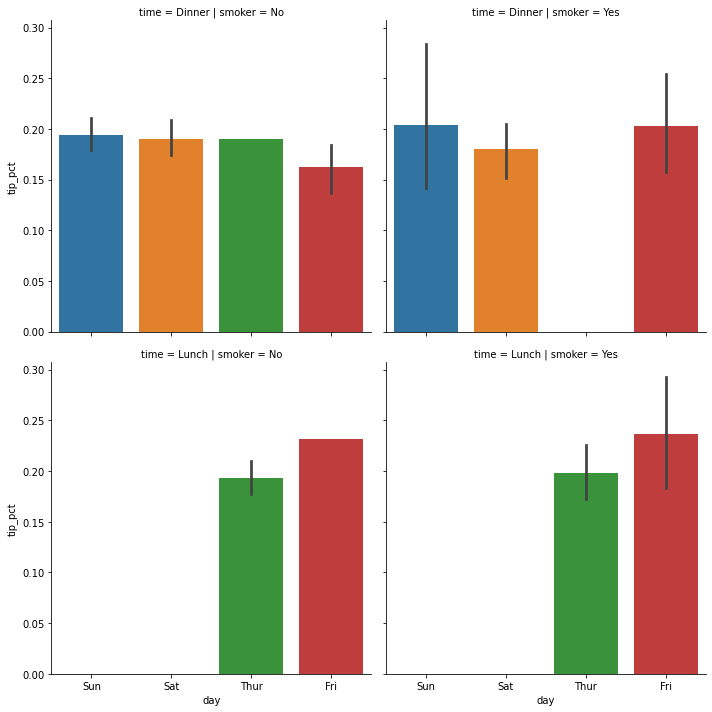

In [54]:
sns.factorplot(x='day', y='tip_pct', row='time',
.....: col='smoker',
.....: kind='bar', data=tips[tips.tip_pct < 1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


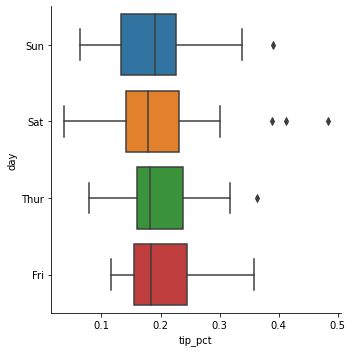

In [55]:
sns.factorplot(x='tip_pct', y='day', kind='box',
.....: data=tips[tips.tip_pct < 0.5])